<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/EDA_and_Visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (7/7), done.


# Question 1:

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**part 1:**

In [86]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn
cc_df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv',low_memory=False)

**part 2: What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.**

In [108]:
print(cc_df.shape)
print(cc_df.head())
#~3798 observations and 63 variables

(3798, 63)
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ... 

**Part 3: Cross tabulate control and level. Describe the patterns you see.**

In [109]:
pd.crosstab(cc_df['control'], cc_df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


a majority of the data is on public schools. Most private not-for-profit schools are for 4-year degrees whereas private for-profit has a relatively even split and public schools  have a majority 2-year degrees.

**part 4: For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description**.

<Axes: xlabel='grad_100_value', ylabel='Count'>

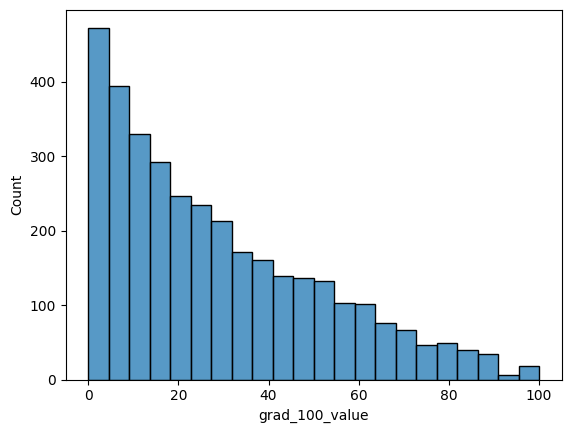

In [111]:
# AI prompt: For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

sns.histplot(cc_df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

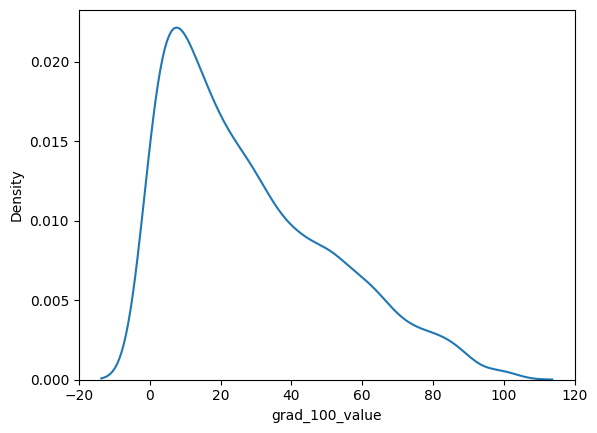

In [112]:
sns.kdeplot(cc_df['grad_100_value'])

<Axes: xlabel='grad_100_value'>

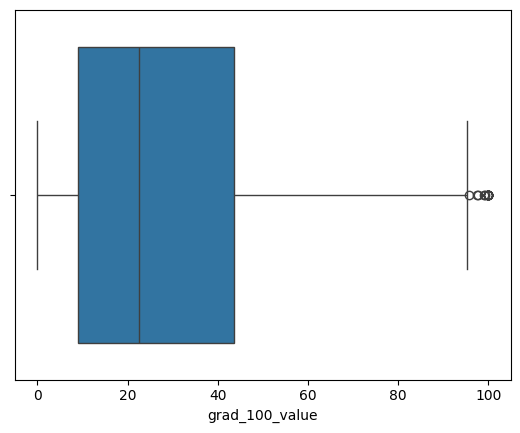

In [113]:
sns.boxplot(x=cc_df['grad_100_value'])

In [114]:
cc_df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


**part 5: For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?**

# Question 4:

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Part 1:**

In [87]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn
#Medicare Current Beneficiary Survey - Survey File (Fall 2021)
Medicare_Survey_df = pd.read_csv('/content/visualization/assignment/data/sfpuf2021_1_fall.csv',low_memory=False, encoding='latin-1') #the AI debugging feature told me to add the "encoding='latin-1'" and that worked

In [88]:
Medicare_Survey_df.head()

,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,21000003,2021,1,1,2,1.0,1,1,3,1,...,988.252590,5273.441518,1095.075758,1245.906455,6049.581125,994.556718,5490.385215,1264.822658,5632.555206,989.464837
1,21000004,2021,1,1,2,1.0,1,1,3,1,...,22599.768459,3574.297077,2905.632202,3011.695926,4283.873099,18154.868227,16722.373362,15553.879545,14193.033902,18737.870831
2,21000005,2021,1,1,2,1.0,1,1,3,1,...,3998.371708,3748.552103,574.146156,4082.909199,559.108837,571.423027,3550.951071,4554.459435,605.491265,612.180490
3,21000011,2021,1,1,2,1.0,1,1,3,1,...,5679.361042,982.382754,1046.200903,1103.813758,1085.475033,1231.049575,1157.845607,720.394183,1134.894480,778.578574
4,21000012,2021,1,1,1,1.0,2,3,1,3,...,12188.282713,14418.230488,10457.419141,2761.012141,2160.504248,2346.820214,2230.871858,17188.553558,12597.595445,13900.497117


**Part 2: Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.**

The data dictonary explains that inappicable.missing data is handled as:
" .  Inapplicable/Missing"
also .D:Don't know and .R:Refused are used.


most catagorical variables are coded as numeric, for example Race/ethnicity age group is

1:Non-Hispanic white, <65 years                                            
2:Non-Hispanic white, 65-74 years                                          
3:Non-Hispanic white, 75-84 years                                          
4:Non-Hispanic white, 85+ years                                            
5:Non-Hispanic black, <65 years                                            
6:Non-Hispanic black, 65-74 years                                          
7:Non-Hispanic black, 75-84 years                                          
8:Non-Hispanic black, 85+ years                                            
9:Hispanic, <65 years                                                      
10:Hispanic, 65-74 years                                                   
11:Hispanic, 75+ years                                                     
12:Other, <65 years                                                        
13:Other, 65-74 years                                                      
14:Other, 75+ years

The data dictionary is a plain text file which is slightly hard to follow, but overall the important information is provided

**Part 3: Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.**

In [89]:
#DEM_RACE
#DEM_SEX
#DEM_AGE
#ADM_H_OUTSW --  1+ outpatient visit current yr (FFS) (1:yes, 2:no)
#ADM_H_ACTSTY -- Number inpatient stays current yr (FFS) (0:no stay, 1:1 stay ... 4:4+ stay)
#INS_D_PRIVNUM -- One or more private plans (1:yes, 2:no)
#DEM_INCOME (1:<$25,000 ,2:>=$25,000)
#HLT_OCDEPRSS Depression (ever) (.D:Don't know, .R:Refused,.  Inapplicable/Missing,1:Yes,2:No)

In [90]:
#I think that outpaitent visits and number of inpaitent stays is interesting to see if
#out paitent visits leads to more or less need for extended in person stays

In [91]:
#rename variables
Medicare_Survey_df = Medicare_Survey_df.rename(columns = {'ADM_H_ACTSTY':'inpatient_stays',
                    'ADM_H_OUTSW':'outpatient_visit'}) # Rename variables

In [92]:
# I used the colab ai with the prompt: make outpatient_visit levels yes and no

# Create a mapping dictionary for outpatient_visit
outpatient_visit_mapping = {1: 'Yes', 2: 'No'}

# Use the map function to replace the numeric values with 'Yes' and 'No'
Medicare_Survey_df['outpatient_visit'] = Medicare_Survey_df['outpatient_visit'].map(outpatient_visit_mapping)

# Print the updated DataFrame to verify the changes
print(Medicare_Survey_df['outpatient_visit'].unique())


['Yes' 'No']


In [93]:
Medicare_Survey_df["inpatient_stays"].describe()

,inpatient_stays
count,12783.000000
mean,0.086991
std,0.390714
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [94]:
#I also think how race and sex impact weather or not people seak and receive care is interesting.

In [95]:
print(Medicare_Survey_df.loc[0:30,('DEM_RACE','DEM_SEX','DEM_AGE')],'\n') # Show rows 0:5 of Sex and Race

    DEM_RACE  DEM_SEX  DEM_AGE
0          1        2        3
1          2        1        2
2          1        2        3
3          1        2        3
4          3        2        2
5          1        1        3
6          1        2        1
7          3        1        3
8          1        2        3
9          3        1        3
10         2        2        2
11         1        2        3
12         3        1        1
13         1        2        3
14         1        2        2
15         3        2        1
16         1        1        3
17         3        2        2
18         1        1        2
19         1        2        2
20         2        1        1
21         1        2        2
22         1        2        3
23         2        2        2
24         1        1        3
25         1        2        1
26         1        2        2
27         3        1        1
28         1        1        1
29         1        2        3
30         3        1        1 



In [96]:
print(Medicare_Survey_df["DEM_SEX"].unique(),'\n') # 'n' is not listed in the codebook
print(Medicare_Survey_df["DEM_SEX"].value_counts(), '\n') #

[2 1] 

DEM_SEX
2    6919
1    5864
Name: count, dtype: int64 



In [97]:
# Create a mapping dictionary for dem_sex
sex_mapping = {1: 'Male', 2: 'Female'}

# Use the map function to replace the numeric values with 'Yes' and 'No'
Medicare_Survey_df['DEM_SEX'] = Medicare_Survey_df['DEM_SEX'].map(sex_mapping)

# Print the updated DataFrame to verify the changes
print(Medicare_Survey_df['DEM_SEX'].unique())

['Female' 'Male']


In [98]:
print(Medicare_Survey_df['DEM_RACE'].unique(),'\n') # 'n' is not listed in the codebook
print(Medicare_Survey_df['DEM_RACE'].value_counts(), '\n') #

[1 2 3 4] 

DEM_RACE
1    9467
3    1396
2    1211
4     709
Name: count, dtype: int64 



In [99]:
# Create a mapping dictionary for DEM_RACE
race_mapping = {1: 'White', 2: 'Black', 3: 'Hispanic',4: 'Other'}

# Use the map function to replace the numeric values with 'Yes' and 'No'
Medicare_Survey_df['DEM_RACE'] = Medicare_Survey_df['DEM_RACE'].map(race_mapping)

# Print the updated DataFrame to verify the changes
print(Medicare_Survey_df['DEM_RACE'].unique())

['White' 'Black' 'Hispanic' 'Other']


In [100]:
print(Medicare_Survey_df['DEM_AGE'].unique(),'\n') # 'n' is not listed in the codebook
print(Medicare_Survey_df['DEM_AGE'].value_counts(), '\n') #

[3 2 1] 

DEM_AGE
3    6119
2    4508
1    2156
Name: count, dtype: int64 



In [101]:
# Create a mapping dictionary for dem_sex
age_mapping = {1: '<65 years', 2: '65-74 years ', 3: '75+ years'}

# Use the map function to replace the numeric values with 'Yes' and 'No'
Medicare_Survey_df['DEM_AGE'] = Medicare_Survey_df['DEM_AGE'].map(age_mapping)

# Print the updated DataFrame to verify the changes
print(Medicare_Survey_df['DEM_AGE'].unique())

['75+ years' '65-74 years ' '<65 years']


**Part 4: For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?**

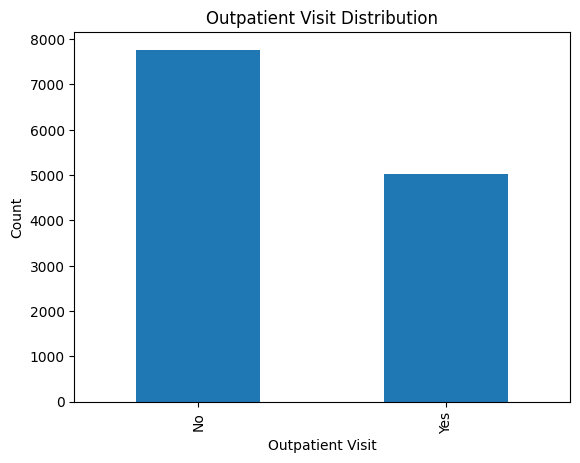

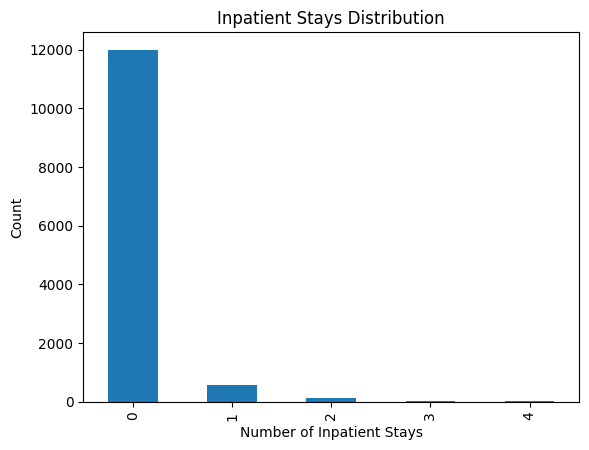

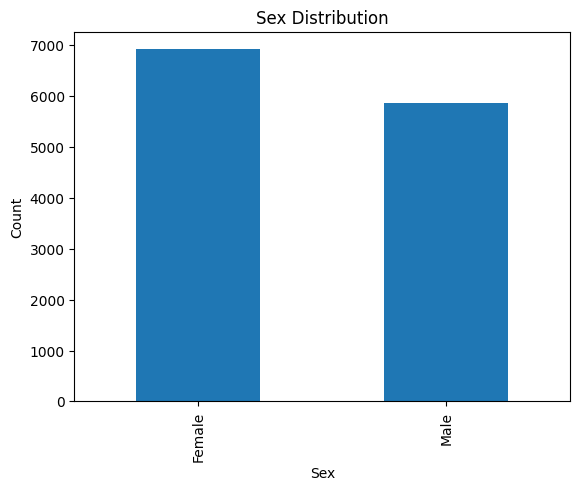

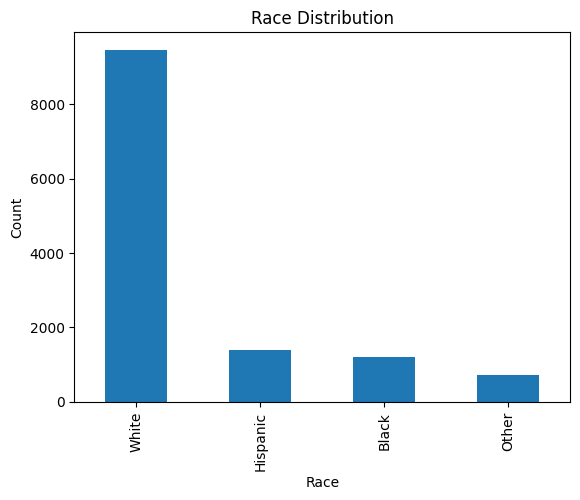

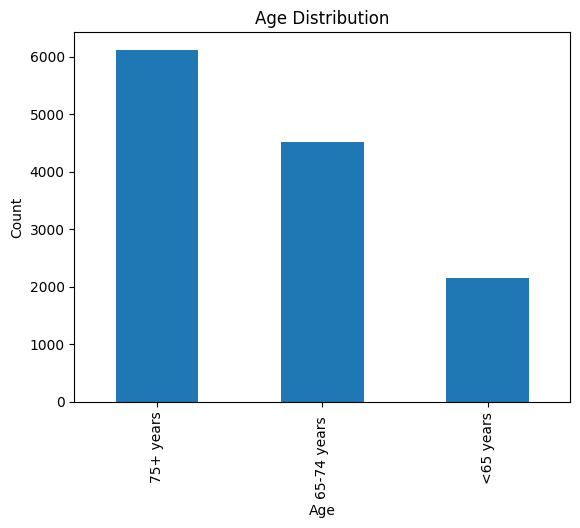

In [102]:
import matplotlib.pyplot as plt

# Create a bar graph for 'outpatient_visit'
Medicare_Survey_df['outpatient_visit'].value_counts().plot(kind='bar')
plt.title('Outpatient Visit Distribution')
plt.xlabel('Outpatient Visit')
plt.ylabel('Count')
plt.show()

# Create a bar graph for 'inpatient_stays'
Medicare_Survey_df['inpatient_stays'].value_counts().plot(kind='bar')
plt.title('Inpatient Stays Distribution')
plt.xlabel('Number of Inpatient Stays')
plt.ylabel('Count')
plt.show()


# Create a bar graph for 'DEM_SEX'
Medicare_Survey_df['DEM_SEX'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Create a bar graph for 'DEM_RACE'
Medicare_Survey_df['DEM_RACE'].value_counts().plot(kind='bar')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Create a bar graph for 'DEM_AGE'
Medicare_Survey_df['DEM_AGE'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The only graph that possibly has outliers is inpaitent stays, which makes sense because a vast majority of people have none and very few have four. However, the more extreme values in this distribution are still important to include and consider in my analysis.

**Part 5: Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?**

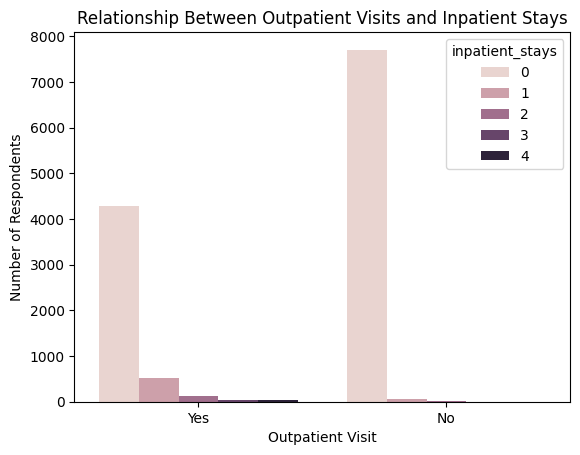

In [103]:
import matplotlib.pyplot as plt
sns.countplot(x='outpatient_visit', hue='inpatient_stays', data=Medicare_Survey_df)
plt.xlabel('Outpatient Visit')
plt.ylabel('Number of Respondents')
plt.title('Relationship Between Outpatient Visits and Inpatient Stays')
plt.show()
plt.show()

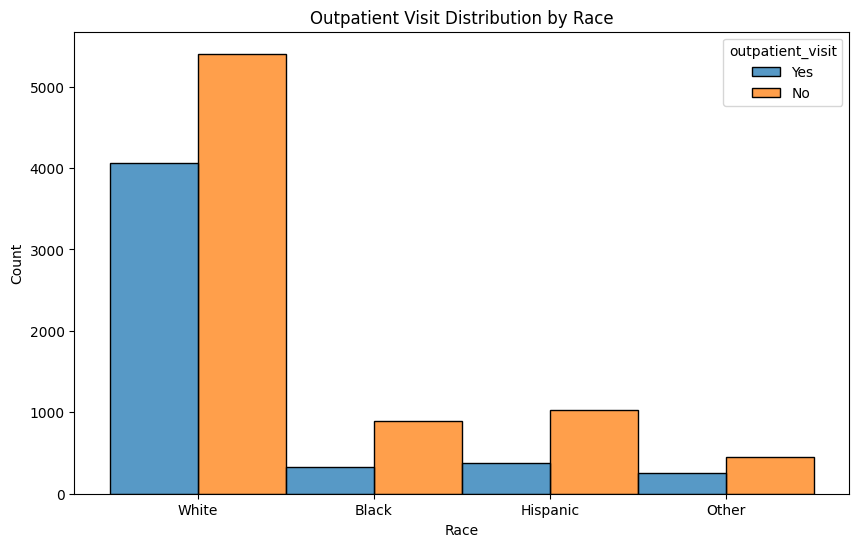

In [104]:
# AI prompt: make a histogram comparing race and weather or not someone had an outpaitent visit

# Create a histogram comparing race and outpatient visits
plt.figure(figsize=(10, 6))
sns.histplot(x='DEM_RACE', hue='outpatient_visit', data=Medicare_Survey_df, multiple='dodge')
plt.title('Outpatient Visit Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


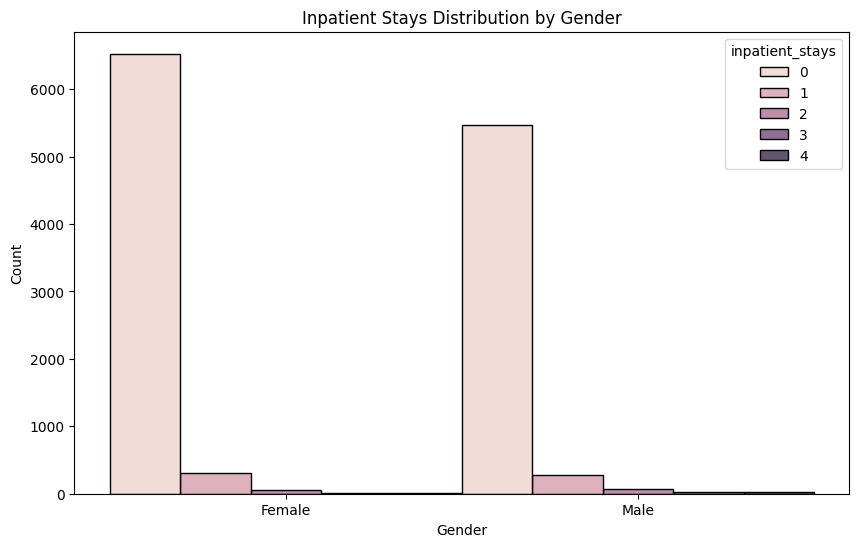

In [105]:
# AI prompt: compare gender and inpaitent stays with a histogram

# Create a histogram comparing gender and inpatient stays
plt.figure(figsize=(10, 6))
sns.histplot(x='DEM_SEX', hue='inpatient_stays', data=Medicare_Survey_df, multiple='dodge')
plt.title('Inpatient Stays Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Part 6: Create a scatter plot, and describe the relationship you see.**

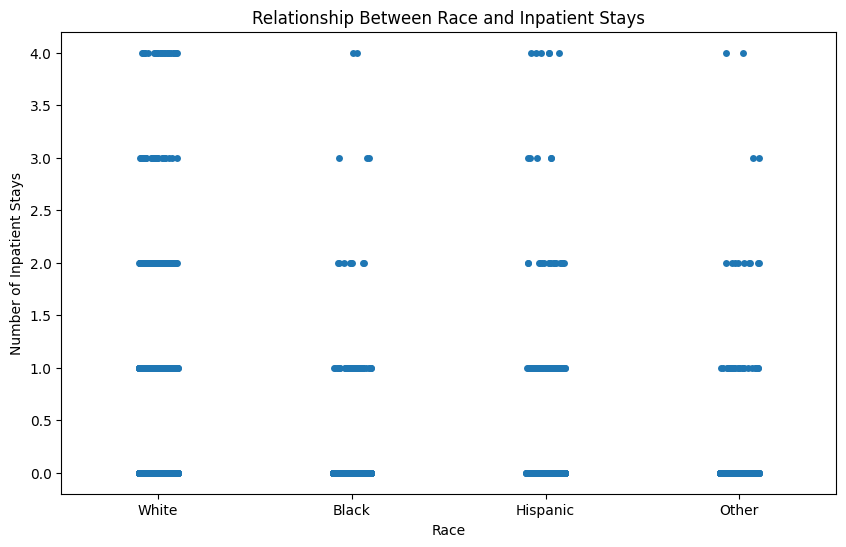

In [106]:
# AI prompt:  Create a scatter plot and jitter the points

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.stripplot(x='DEM_RACE', y='inpatient_stays', data=Medicare_Survey_df, jitter=True)
plt.title('Relationship Between Race and Inpatient Stays')
plt.xlabel('Race')
plt.ylabel('Number of Inpatient Stays')
plt.show()


Because my variables are catagorical, a scatter plot is not that helpful in seeing a relationship between variables. To help fix this sligtly I jitttered the points to be able to see how many are in each catagory, however, in my opinion using side by side histograms of different variables is more heplful. With that said, an interesting relation that I see from this scatter plot is how few people whose race is catagorized as Black of other have extensive in-paitent stays (3+ days). This relationship seems important as it raises questions of weather these groups are receiveing the in-paitent care they need when they need it.

**Part 7: Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.**

In [107]:
#I used the colab ai for this with the prompt: make a five number summary for inpatient_stays and crosstabs for the other variables

# Five-number summary for inpatient_stays
print("\nFive-Number Summary for Inpatient Stays:\n", Medicare_Survey_df['inpatient_stays'].describe())

# Cross tabulation of outpatient_visit and inpatient_stays
cross_tab = pd.crosstab(Medicare_Survey_df['outpatient_visit'], Medicare_Survey_df['inpatient_stays'])
print("Cross Tabulation of Outpatient Visit and Inpatient Stays:\n", cross_tab)

# Cross tabulation of DEM_RACE and outpatient_visit
race_outpatient_cross_tab = pd.crosstab(Medicare_Survey_df['DEM_RACE'], Medicare_Survey_df['outpatient_visit'])
print("\nCross Tabulation of Race and Outpatient Visit:\n", race_outpatient_cross_tab)

# Cross tabulation of DEM_SEX and inpatient_stays
sex_inpatient_cross_tab = pd.crosstab(Medicare_Survey_df['DEM_SEX'], Medicare_Survey_df['inpatient_stays'])
print("\nCross Tabulation of Sex and Inpatient Stays:\n", sex_inpatient_cross_tab)



Five-Number Summary for Inpatient Stays:
 count    12783.000000
mean         0.086991
std          0.390714
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: inpatient_stays, dtype: float64
Cross Tabulation of Outpatient Visit and Inpatient Stays:
 inpatient_stays      0    1    2   3   4
outpatient_visit                        
No                7703   58    7   2   0
Yes               4288  526  125  38  36

Cross Tabulation of Race and Outpatient Visit:
 outpatient_visit    No   Yes
DEM_RACE                    
Black              889   322
Hispanic          1024   372
Other              454   255
White             5403  4064

Cross Tabulation of Sex and Inpatient Stays:
 inpatient_stays     0    1   2   3   4
DEM_SEX                               
Female           6525  310  55  13  16
Male             5466  274  77  27  20


The Five-Number Summary for Inpatient Stays shows that the first three quantiiles of data (75%) have had 0 in-paitent stays. The max is coded as 4 which the data dicitonary explains is 4+ stays.

I also found the Cross Tabulation of Race and Outpatient Visit to be interesting. Particularly, ~0.43% of white people had an outpaitent visit in the year and only ~0.27% of Hispanic people had an outpaitent visit which indicates a disparity